<a href="https://colab.research.google.com/github/Sreejith-CG/Machine-Learning/blob/main/Project_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
usedcar=pd.read_csv('/content/autos.csv').drop('index',axis=1)
usedcar
color = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']


**ABOUT THE DATASET**

***The autos.csv dataset is a comprehensive collection of valuable data about used cars, and provides insight into how the cars are being sold, what price they are being sold for, and all the details about their condition. Each ad contains information such as dateCrawled (the date the ad was first seen), name of the car, seller type (private or dealer), offer type, price, A/B testing information , vehicle type, year of registration (at which year was the car first registered) , gearbox type, power output in PS (horsepower) , model of car , howmany kilometers has it driven so far , monthof registration(when it was first registered)(essentially giving us an idea about its age), fueltype utilized by it( petrol/diesel/electricity/lpg etc.), brand name to which it belongs to  notRepairedDamage - if there is any damage on the vehicle that has not been repaired yet. DateCreated gives us information when this particular advertisement was created in ebay or other place where these cars can be posted. The nrofpictures field will give you an estimate regarding how many images have been included with this ad and postalcode contain info regarding area code where car have been posted.. Lastly lastseen give us time estimation when a crawler last scan this particular post online .All these factors are instrumental in determining a suitable price for used vehicles . Meanwhile regression analysis based on average prices related to years can be done from this dataset .***

In [ ]:
usedcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [ ]:
usedcar.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [ ]:
usedcar.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
usedcar.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

 **The three columns dateCrawled, dateCreated, and lastSeen in the used_car_data DataFrame are currently being stored as object data types, which means that they are being treated as strings. However, these columns likely contain date and time information, and it would be more useful to store them as datetime data types.**

In [ ]:
usedcar['dateCrawled']=pd.to_datetime(usedcar['dateCrawled'])
usedcar['dateCreated']=pd.to_datetime(usedcar['dateCreated'])
usedcar['lastSeen']=pd.to_datetime(usedcar['lastSeen'])
usedcar.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [ ]:
usedcar.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


# **Calculating the percentage of missing values in each column of the used car DataFrame**

In [ ]:
percentage_missvalues=usedcar.isna().sum().sort_values(ascending=False)*100/len(usedcar)
percentage_missvalues

notRepairedDamage      19.395577
vehicleType            10.192771
fuelType                8.986133
model                   5.513447
gearbox                 5.439429
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
dateCrawled             0.000000
name                    0.000000
powerPS                 0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
lastSeen                0.000000
dtype: float64

#**EDA**

**PLOTTING THE PERCENTAGE OF MISSING VALUES**

<AxesSubplot:xlabel='index', ylabel='0'>

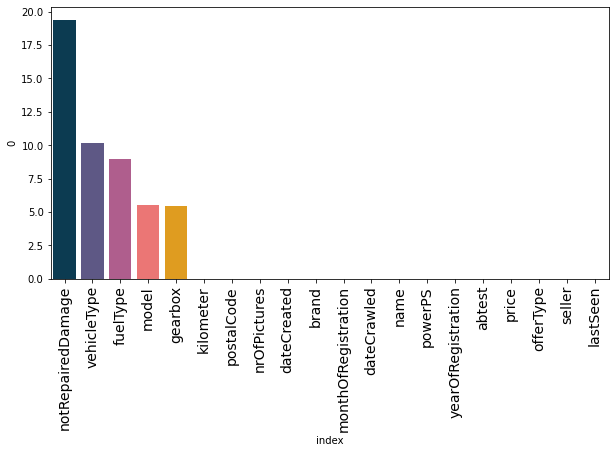

In [ ]:
miss=pd.DataFrame(percentage_missvalues.reset_index())
miss
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, fontsize=14)
sns.barplot(y=miss[0],x=miss['index'],palette=color)



**FINDING THE CORRELATION OF THE *USEDCAR* DATAFRAME**

In [ ]:
usedcar.corr().style.background_gradient('Greens')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826,nan,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607,nan,-0.001652
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358,nan,0.027113
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838,nan,-0.026694
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000,nan,0.014963
nrOfPictures,nan,nan,nan,nan,nan,nan,nan
postalCode,-0.003164,-0.001652,0.027113,-0.026694,0.014963,nan,1.000000


**HEATMAP OF THE ABOVE CORRELATION**

<AxesSubplot:>

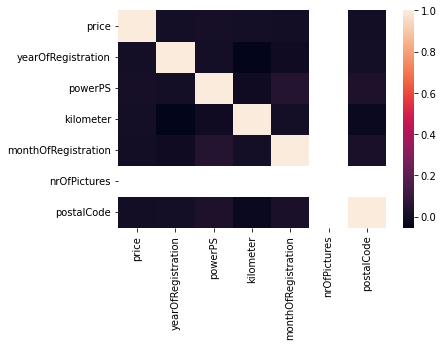

In [ ]:
corr_mat = usedcar.corr()
sns.heatmap(corr_mat)

**PLOTTING THE COUNT OF EACH BRAND FROM THE DATAFRAME**

<AxesSubplot:xlabel='count', ylabel='brand'>

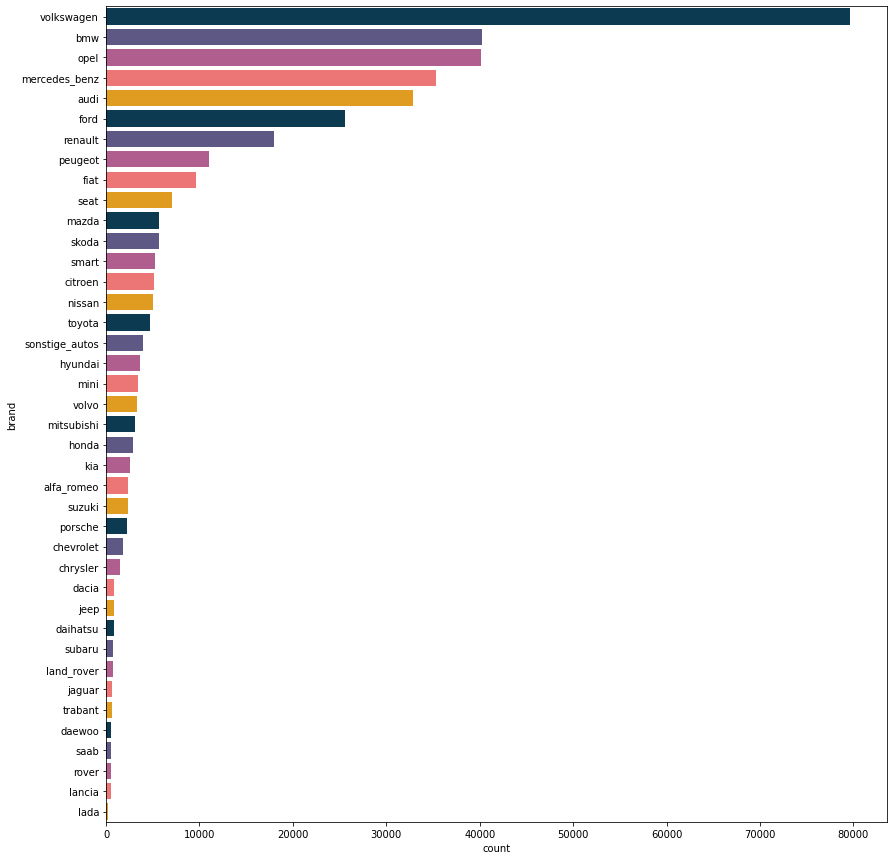

In [ ]:
plt.figure(figsize=(14,15))
sns.countplot(y=usedcar['brand'],order=usedcar['brand'].value_counts().index, palette=color)

**ANALYSING WHICH YEAR HAS MORE REGISTRATION** ***FROM YEAR 1886 TO 2022***

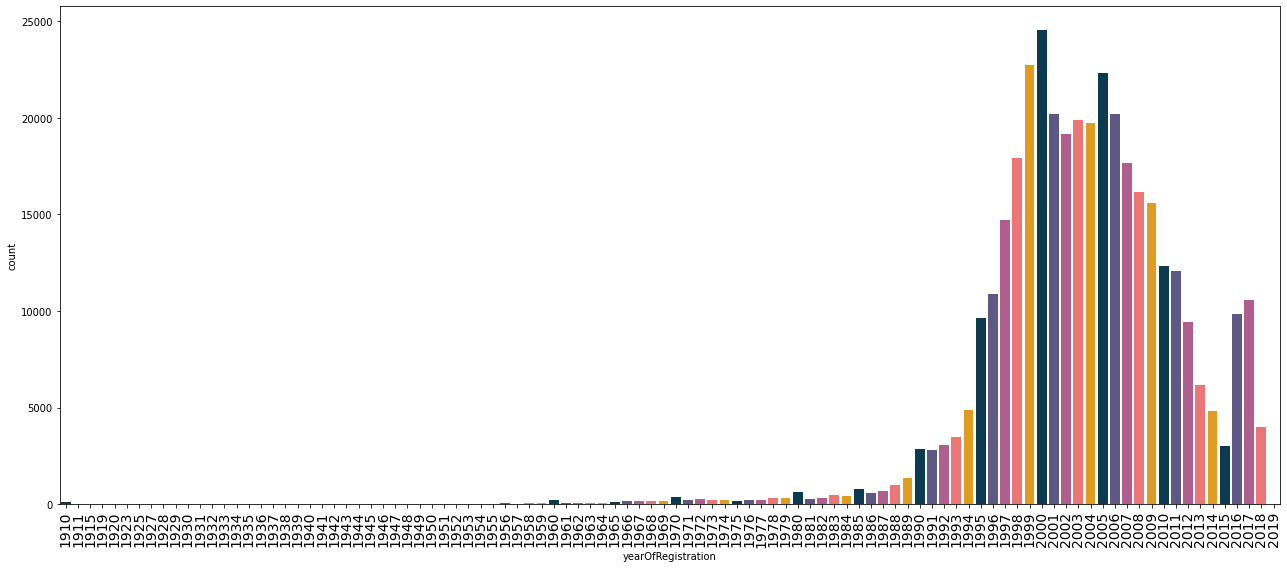

In [ ]:
yearsort = usedcar[(usedcar['yearOfRegistration'] >= 1886) &(usedcar['yearOfRegistration'] <= 2022)]
plt.figure(figsize=(18,8))
sns.countplot(x=yearsort['yearOfRegistration'],palette=color)
plt.xticks(rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

**VISUALIZING WHICH YEAR HAS HIGHEST PRICE RANGE FOR THE USED CARS**

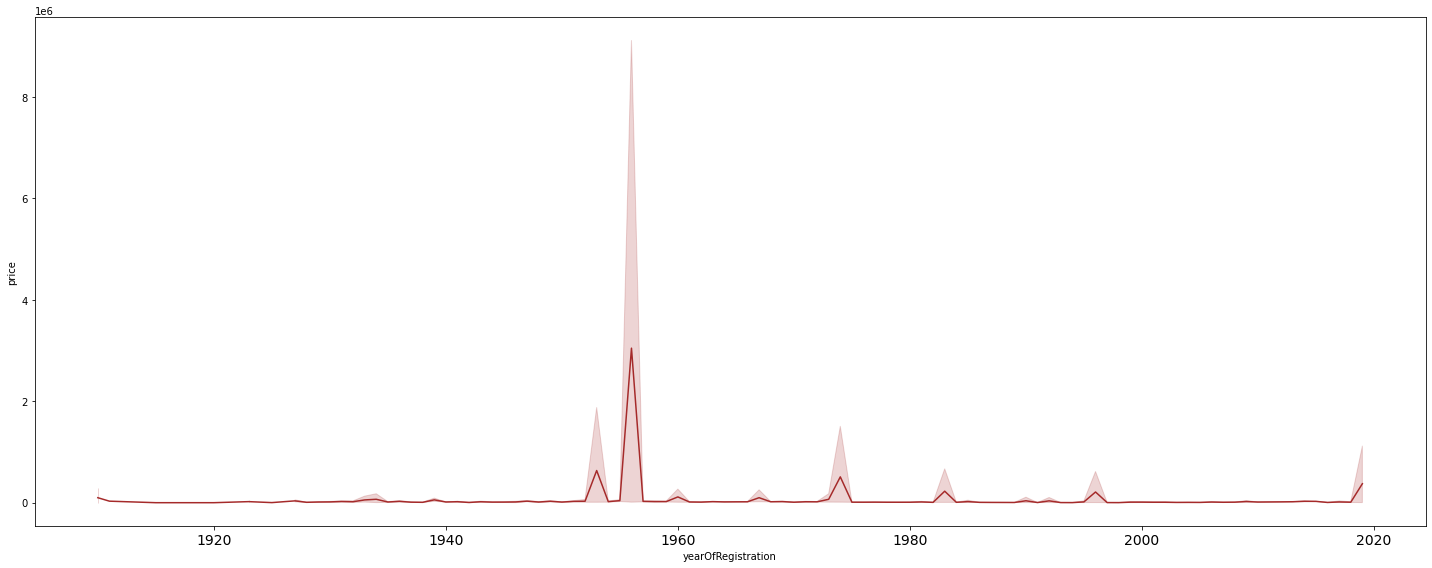

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=yearsort['yearOfRegistration'], y=yearsort['price'],color='brown')
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

**PLOTTING COUNT BETWEEN BRAND AND SOME NECESSARY COULMNS**

**tight_layout()** *automatically adjusts subplot params so that the subplot(s) fits in to the figure area.*

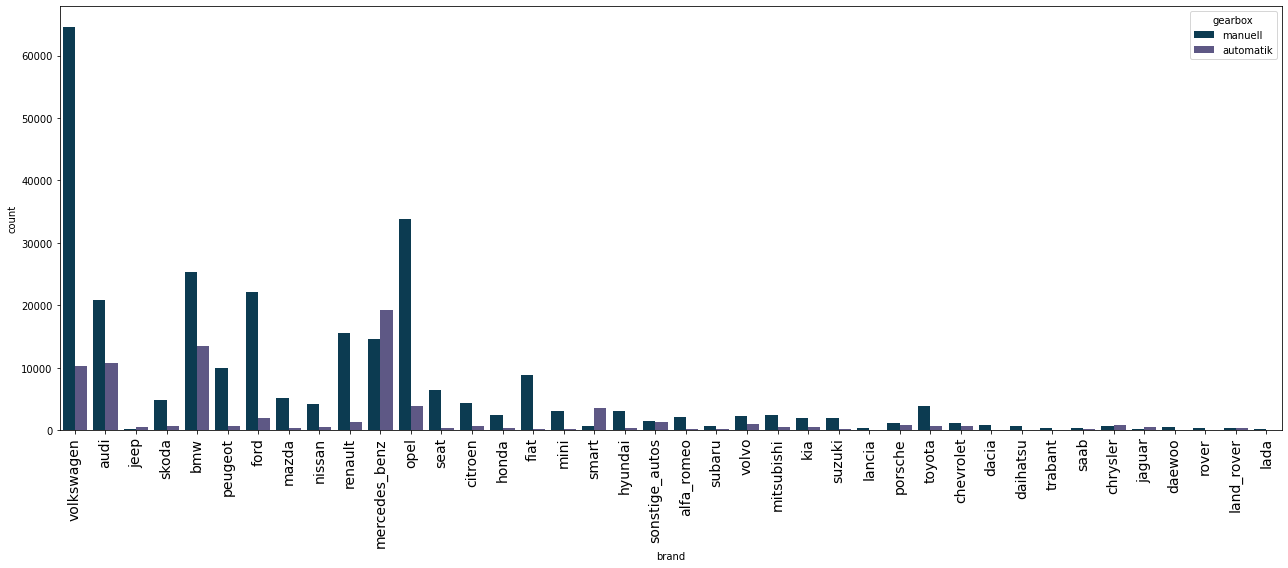

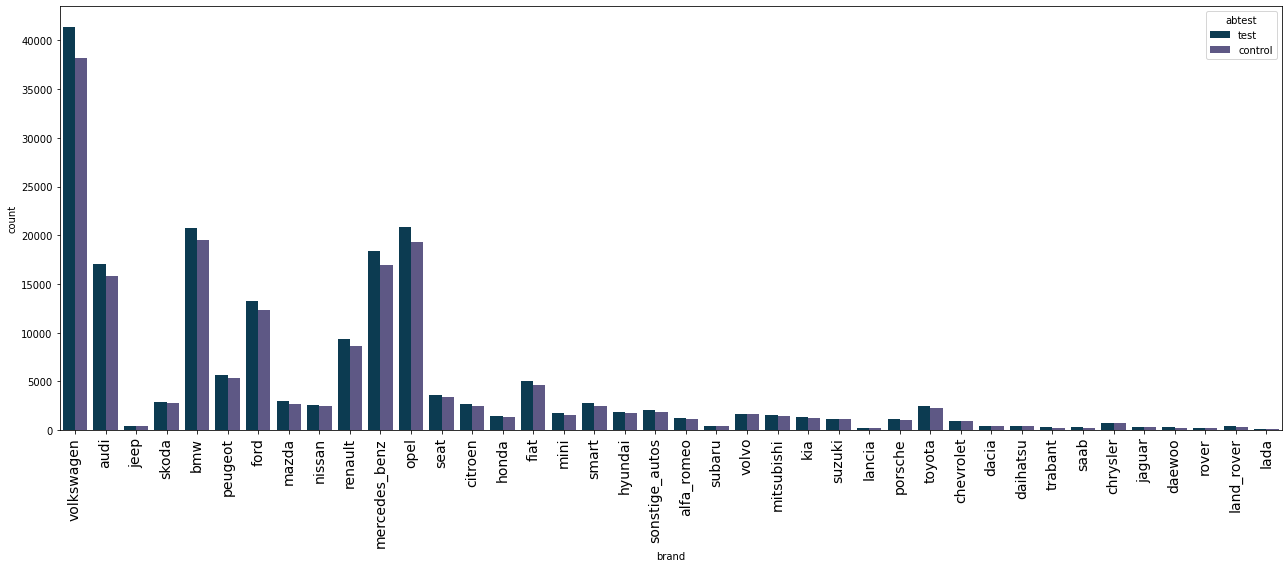

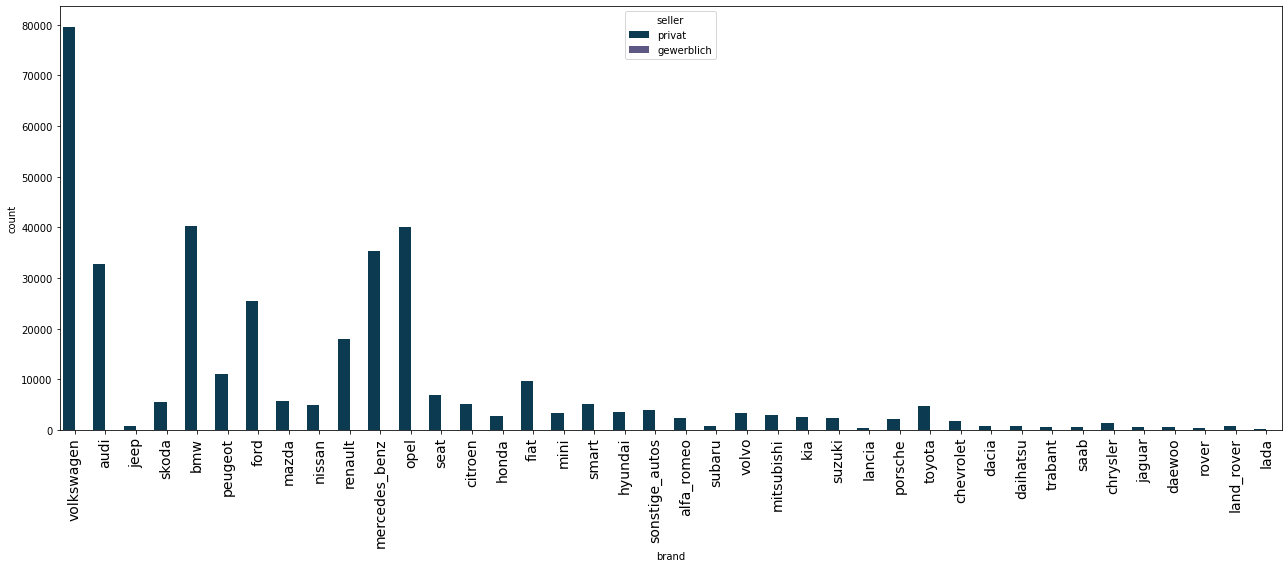

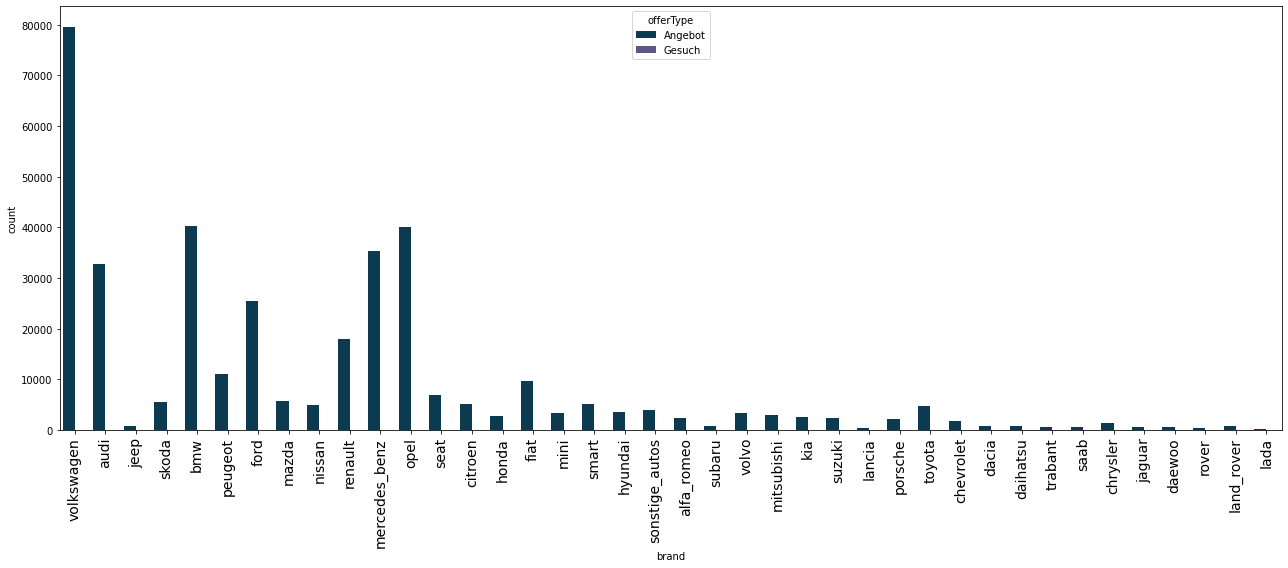

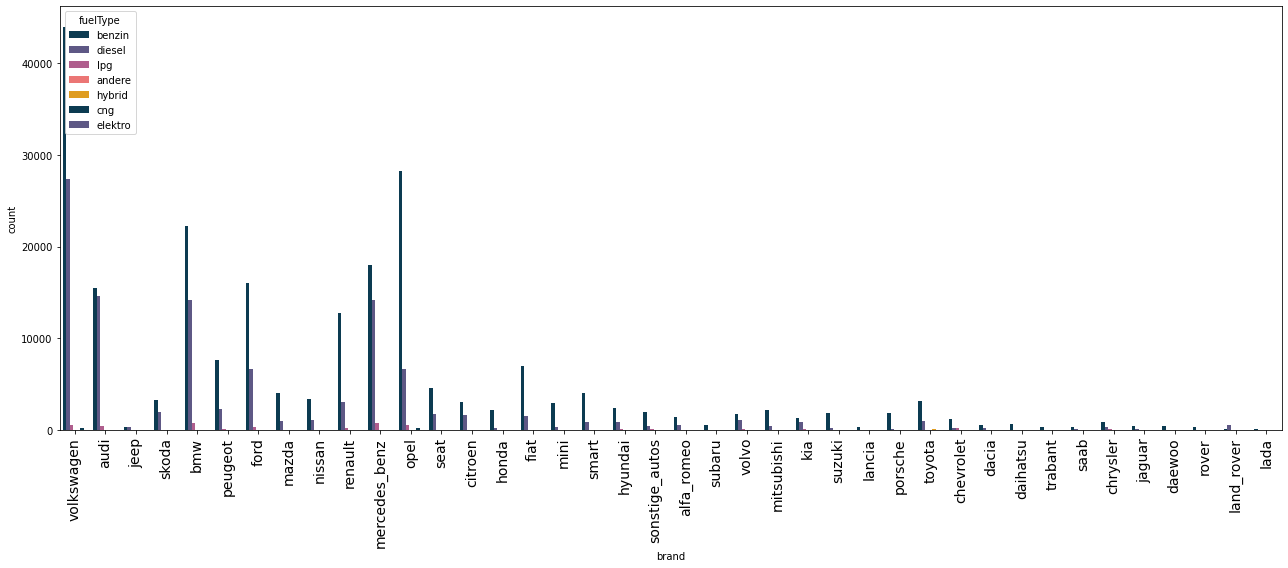

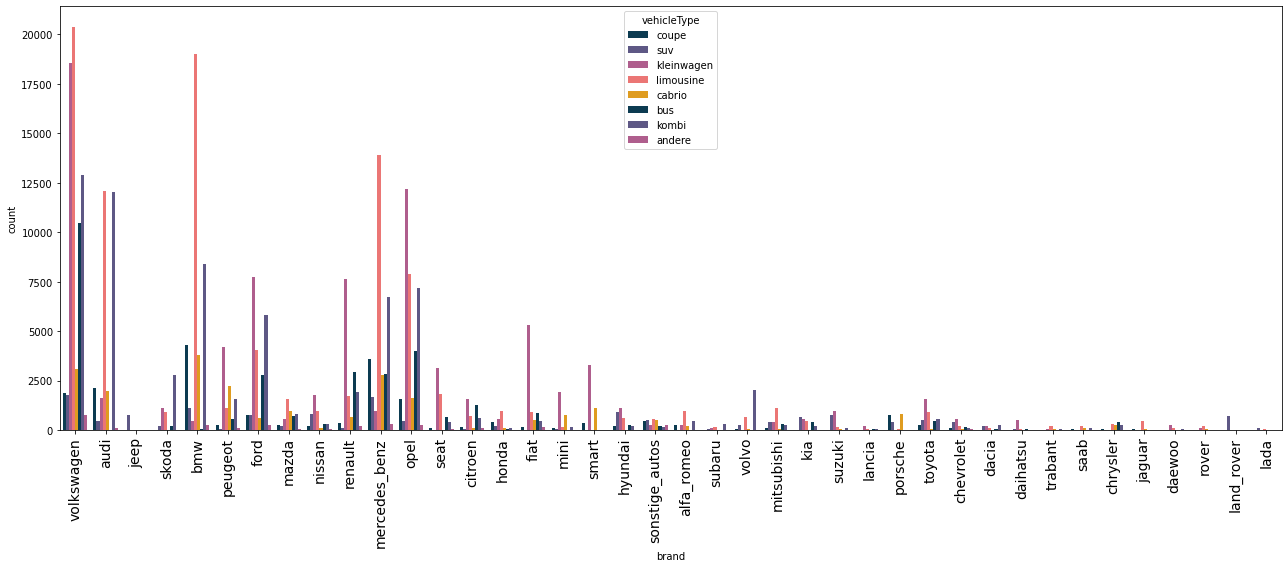

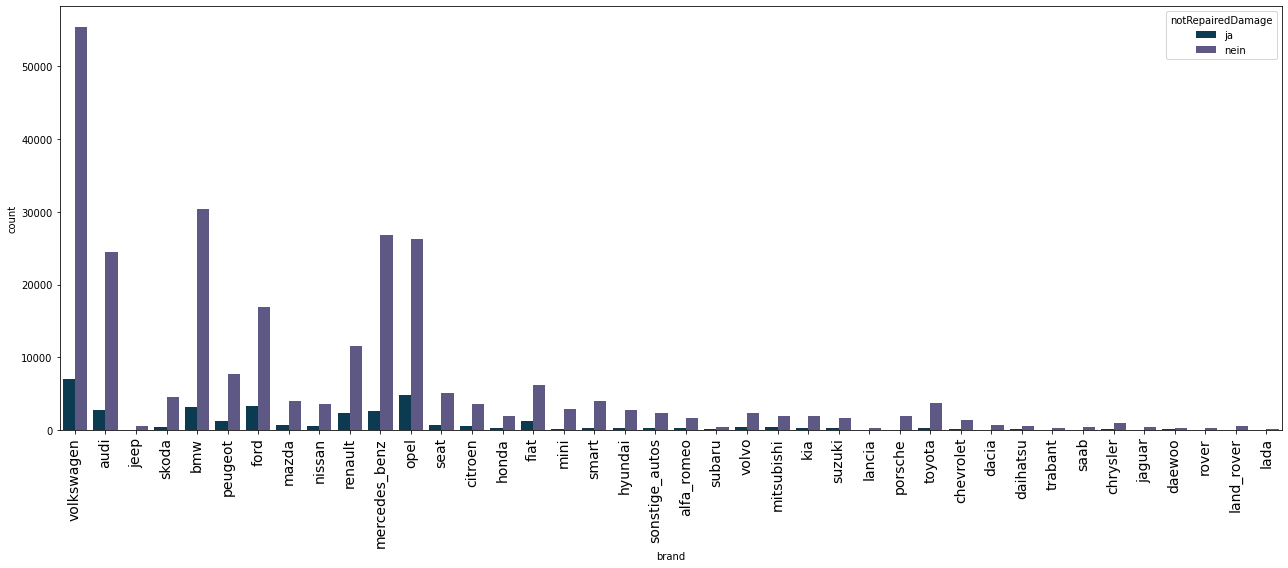

In [ ]:
def count_plot(hue):    
    plt.figure(figsize=(18,8))
    sns.countplot(x=usedcar['brand'], hue=usedcar[hue],palette=color)
    plt.xticks(rotation=90, fontsize=14)
    plt.tight_layout()
    plt.show()
columns = ['gearbox','abtest','seller','offerType','fuelType','vehicleType','notRepairedDamage']
for c in columns:
    count_plot(c)

**SHOWING THE COUNT OF FUEL TYPE OF EACH MODEL OF EVERY BRAND**

**Enumerate()**  *method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() function.*

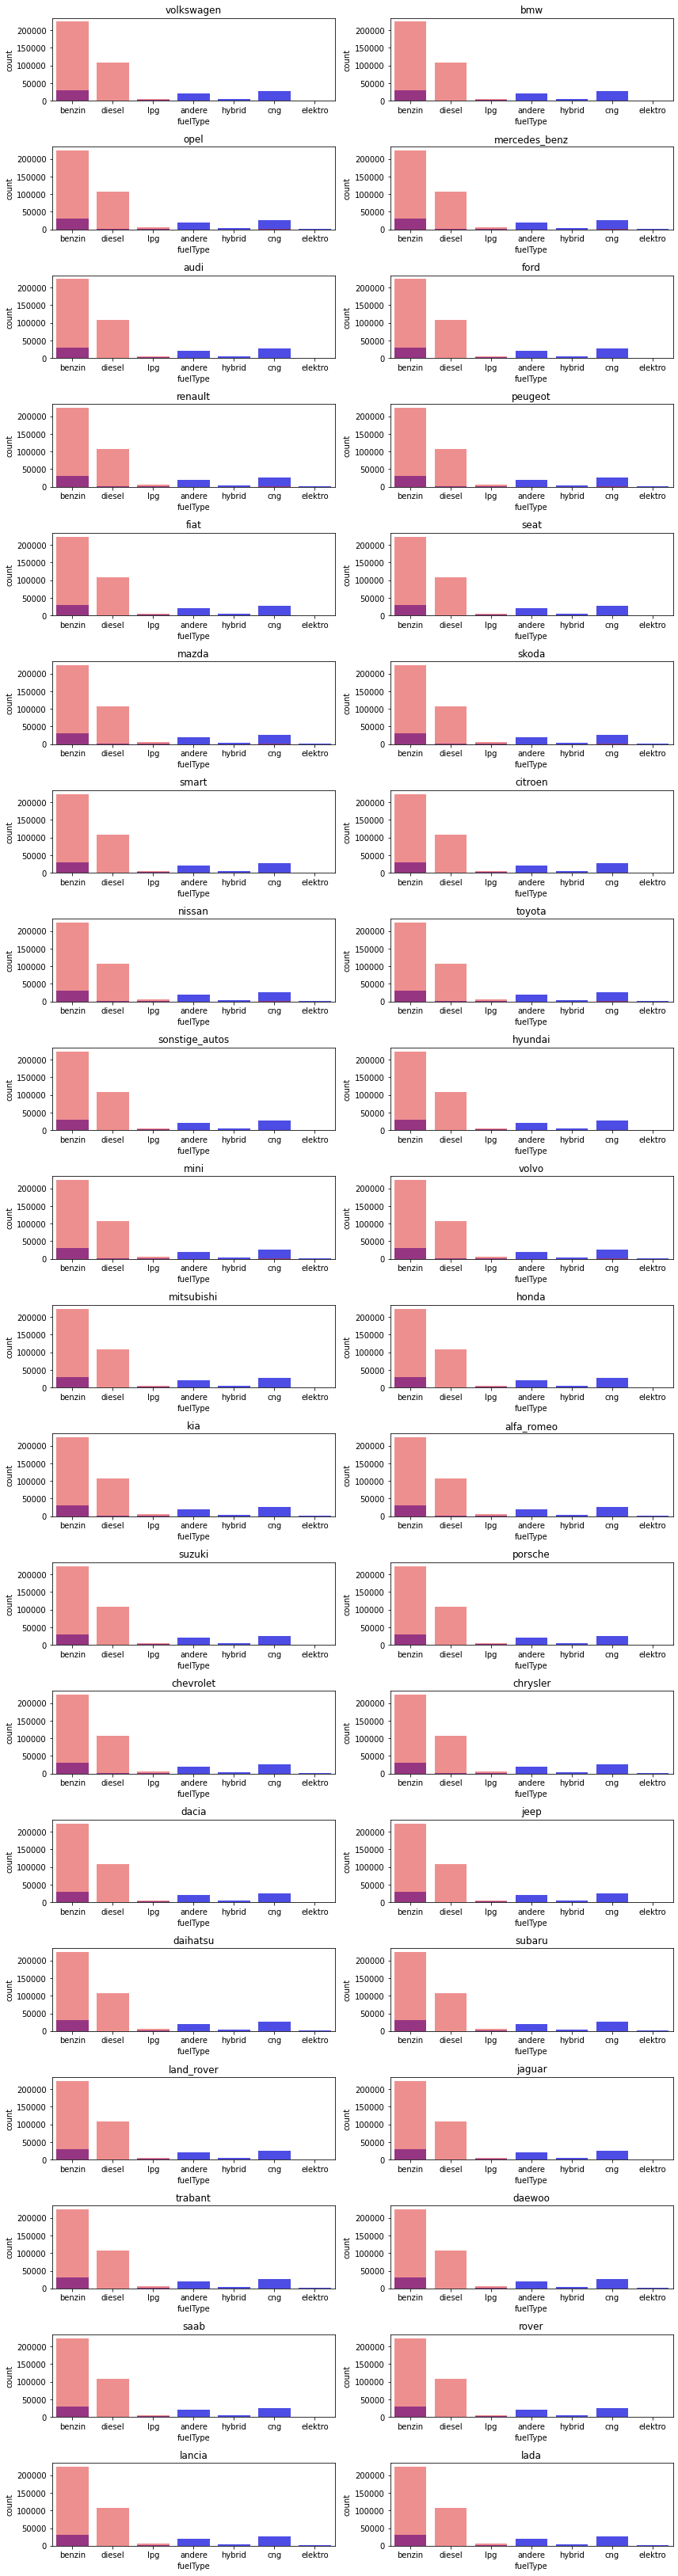

In [ ]:
brandcnt = usedcar['brand'].value_counts()

plt.figure(figsize=(12,90))
for i,col in enumerate(brandcnt.index):
    axes = plt.subplot(40,2,i + 1)
    sns.countplot(x=usedcar['model'],data=usedcar[usedcar['brand'] ==col], color='blue', alpha=0.8)
    sns.countplot(x=usedcar['fuelType'],data=usedcar[usedcar['brand'] == col], color='red', alpha=0.5)
    plt.title(col)
plt.tight_layout()
plt.show()

# **FILLING MISSING VALUES USING fillna()**

In [ ]:
fill_cols = ['notRepairedDamage','vehicleType','fuelType','gearbox','model']
for i in fill_cols:
    mode = usedcar[i].mode()[0]
    usedcar[i].fillna(mode, inplace=True)

usedcar.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

# **DROPPING USELESS COLUMNS FOR THE MODEL CREATION.**

In [ ]:
useless_col=["nrOfPictures", "lastSeen", "dateCrawled", "name", "monthOfRegistration", "dateCreated", "postalCode", "seller", "offerType","model"]
new_used_car=usedcar.drop(useless_col,axis=1)
new_used_car.shape

(371528, 10)

# **REMOVING OUTLIERS**

***Outliers are data points that are significantly different from the rest of the data. These data points can sometimes have a significant effect on statistical analyses and may lead to incorrect conclusions. Therefore, it is often a good practice to identify and remove outliers from the data before performing any statistical analysis. This function uses the interquartile range (IQR) method to identify and remove outliers from a dataframe. The IQR is calculated as the difference between the first and third quartiles (Q1 and Q3). Data points that are less than Q1 - 1.5 IQR or m than Q3 + 1.5 IQR are considered outliers and are removed from the dataframe.***


**This function removes outliers from a given dataframe by calculating the lower and upper bounds of the interquartile range (IQR).**


**Outliers are defined as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles,respectively .**



**Input:**

  **df (pd.DataFrame): A dataframe containing numeric columns**

**Output:**

  **df (pd.DataFrame): A dataframe containing only rows that are not considered outliers**

In [ ]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:

   Q1 = new_used_car.quantile(.1, numeric_only=True)  # find the Q1 value for each column with numeric data
   Q3 = new_used_car.quantile(.9, numeric_only=True)  # find the Q3 value for each column with numeric data
   IQR = Q3 - Q1                                      # find the interquartile range for each column with numeric data
    

    # return the dataframe with rows that do not have any values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR

   return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
   
clean_used_car=remove_outliers(new_used_car)  

<ipython-input-219-b6796d3a97b0>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


# **Assigning dummy variables to categorical variables**

In [ ]:
dummy_used_car = pd.get_dummies(clean_used_car, prefix='vehicleType', prefix_sep='.', 
                            columns=['vehicleType'])
dummy_used_car = pd.get_dummies(dummy_used_car, prefix='fuelType', prefix_sep='.', 
                            columns=['fuelType'], drop_first=True)
dummy_used_car = pd.get_dummies(dummy_used_car, prefix='notRepairedDamage', prefix_sep='.', 
                            columns=['notRepairedDamage'], drop_first=True)
dummy_used_car = pd.get_dummies(dummy_used_car, prefix='abtest', prefix_sep='.', 
                            columns=['abtest'], drop_first=True)
dummy_used_car = pd.get_dummies(dummy_used_car, prefix='gearbox', prefix_sep='.', 
                            columns=['gearbox'], drop_first=True)
dummy_used_car = pd.get_dummies(dummy_used_car, prefix='brand', prefix_sep='.', 
                            columns=['brand'], drop_first=True)



**SHOWING THE CORRELATION BETWEEN DUMMY VARIABLES**

In [ ]:
dummy_used_car.corr().style.background_gradient('Greens')

,price,yearOfRegistration,powerPS,kilometer,vehicleType.andere,vehicleType.bus,vehicleType.cabrio,vehicleType.coupe,vehicleType.kleinwagen,vehicleType.kombi,vehicleType.limousine,vehicleType.suv,fuelType.benzin,fuelType.cng,fuelType.diesel,fuelType.elektro,fuelType.hybrid,fuelType.lpg,notRepairedDamage.nein,abtest.test,gearbox.manuell,brand.audi,brand.bmw,brand.chevrolet,brand.chrysler,brand.citroen,brand.dacia,brand.daewoo,brand.daihatsu,brand.fiat,brand.ford,brand.honda,brand.hyundai,brand.jaguar,brand.jeep,brand.kia,brand.lada,brand.lancia,brand.land_rover,brand.mazda,brand.mercedes_benz,brand.mini,brand.mitsubishi,brand.nissan,brand.opel,brand.peugeot,brand.porsche,brand.renault,brand.rover,brand.saab,brand.seat,brand.skoda,brand.smart,brand.sonstige_autos,brand.subaru,brand.suzuki,brand.toyota,brand.trabant,brand.volkswagen,brand.volvo
price,1.000000,0.412611,0.526609,-0.400107,-0.021365,0.056052,0.134956,0.101334,-0.216427,0.027867,-0.059962,0.211224,-0.290626,-0.002993,0.299317,0.006569,0.029206,-0.018279,0.175822,-0.001557,-0.315482,0.141776,0.137677,0.012539,-0.014558,-0.032097,0.006037,-0.026911,-0.027449,-0.066941,-0.080188,-0.020550,0.004704,0.024350,0.031326,0.007188,-0.008822,-0.014048,0.049886,-0.025928,0.118060,0.076832,-0.030570,-0.013849,-0.137019,-0.058879,0.112448,-0.108799,-0.022518,-0.008420,-0.019200,0.025988,-0.033637,0.021545,-0.008231,-0.016701,-0.000830,-0.022593,-0.014890,-0.004020
yearOfRegistration,0.412611,1.000000,0.138034,-0.252584,-0.047904,0.029848,-0.057643,-0.087000,-0.080682,0.008060,0.100824,0.054509,-0.223105,0.016649,0.230942,0.009620,0.023454,-0.023053,0.091787,-0.001528,-0.063877,0.025646,-0.011919,0.003810,-0.011462,0.021950,0.048768,-0.002562,-0.003863,0.006969,0.011567,-0.013514,0.055034,-0.013280,-0.007967,0.045166,-0.005807,-0.011594,-0.002016,-0.002041,-0.045208,0.057356,-0.010602,0.006166,-0.028256,0.021124,-0.026691,0.006878,-0.013791,-0.019142,0.036942,0.063715,0.040280,-0.071069,-0.011611,0.003734,0.017966,-0.091967,-0.025473,-0.021596
powerPS,0.526609,0.138034,1.000000,0.023613,-0.037851,0.001175,0.100373,0.168466,-0.355667,0.152815,0.005064,0.150179,-0.202507,-0.010544,0.190042,-0.014087,-0.000563,0.069935,0.059129,-0.003655,-0.393493,0.187026,0.255244,0.011741,0.031813,-0.047060,-0.021550,-0.024649,-0.038894,-0.104933,-0.075845,-0.007185,-0.014236,0.058192,0.038954,-0.003171,-0.019671,-0.011674,0.020930,-0.008681,0.173658,0.016285,-0.009240,-0.032926,-0.117063,-0.056335,0.112108,-0.118678,-0.010016,0.025417,-0.043261,-0.019691,-0.099949,-0.012172,0.010384,-0.038533,-0.017866,-0.054101,-0.122537,0.040275
kilometer,-0.400107,-0.252584,0.023613,1.000000,-0.008322,0.024858,-0.075927,-0.003505,-0.099074,0.118227,0.038065,-0.054290,-0.107559,0.000548,0.100724,-0.032738,-0.027269,0.047352,-0.080395,-0.001591,0.016557,0.041277,0.067933,-0.045177,0.013470,-0.017561,-0.051124,-0.003270,-0.009141,-0.039787,-0.016346,-0.001590,-0.055985,0.001167,-0.000041,-0.036301,-0.032609,-0.001501,0.004278,-0.001661,0.046587,-0.078556,0.001273,-0.020340,0.021714,-0.007177,-0.014783,0.008643,0.007933,0.014167,-0.018131,-0.040313,-0.080240,-0.081521,0.000596,-0.040027,-0.026372,-0.068748,0.032900,0.030422
vehicleType.andere,-0.021365,-0.047904,-0.037851,-0.008322,1.000000,-0.028226,-0.023856,-0.021322,-0.050060,-0.044875,-0.071175,-0.018822,-0.035064,0.006635,0.033182,0.020444,-0.000356,-0.004259,-0.015585,-0.004298,0.022599,-0.017345,-0.010275,0.012346,-0.000808,0.017929,-0.001167,-0.000610,0.003013,0.017821,0.000706,0.000630,-0.005383,-0.003716,-0.002982,0.000827,0.000003,-0.003416,-0.000608,0.001543,-0.001170,-0.004273,0.000307,-0.000640,-0.008963,-0.001659,-0.000164,0.008640,0.002931,-0.001302,0.002515,-0.005670,-0.009455,0.063021,-0.000532,-0.002435,-0.005064,0.001802,0.004655,-0.007757
vehicleType.bus,0.056052,0.029848,0.001175,0.024858,-0.028226,1.000000,-0.075169,-0.067185,-0.157737,-0.141398,-0.224268,-0.059306,-0.215295,0.049126,0.213392,-0.004133,-0.005751,0.007463,-0.000938,-0.000695,0.

# **SPLTTING X AND Y**

In [ ]:
X =dummy_used_car.drop("price", axis = 1).values
y =dummy_used_car["price"].values

# **TRAINING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"Train Shape : {X_train.shape} --------- Test Shape : {X_test.shape}")

Train Shape : (255607, 59) --------- Test Shape : (109547, 59)


# **MODELING WITH DECISION TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
y_pred1

array([ 1349.        ,  5549.57142857,  2361.        , ...,
       22950.        ,   749.5       ,   550.        ])

In [ ]:
from sklearn.metrics import  r2_score
decisiontree=r2_score(y_test,y_pred1)
decisiontree

0.7982239320802085

# **MODELING WITH LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
y_pred2

array([ 3415.07111967,  7034.7271943 ,  4219.08891175, ...,
       12048.62428843,  -582.42666933,  2384.31335042])

In [ ]:
from sklearn.metrics import  r2_score
linear=r2_score(y_test,y_pred2)
linear

0.61487538843836

# **MODELING WITH RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
y_pred3

array([ 1344.23313955,  5509.40374283,  2283.72612958, ...,
       19049.8742619 ,   690.30316667,   800.28666667])

In [ ]:
from sklearn.metrics import  r2_score
randomforest=r2_score(y_test,y_pred3)
randomforest

0.8626439451511654

# **COMPARING THE r2_score OF ALL MODELS**

In [ ]:
models=['LINEAR REGRESSION','DECISON TREE','RANDOM FOREST']
R2_score=[linear,decisiontree,randomforest]
scores= pd.DataFrame({'Model':models, 'R2_score':R2_score})
scores

,Model,R2_score
0,LINEAR REGRESSION,0.614875
1,DECISON TREE,0.798224
2,RANDOM FOREST,0.862644


In [ ]:
scores['R2_score']=scores['R2_score']*100
print(scores)

               Model   R2_score
0  LINEAR REGRESSION  61.487539
1       DECISON TREE  79.822393
2      RANDOM FOREST  86.264395


**SORTING MODELS BASED ON THEIR r2_SCORE**

In [ ]:
#sorting models based on their accuracy score
scores=scores.sort_values(by='R2_score',ascending=True)

**COMPARING THE SCORES USING DIFFERENT GRAPHS**

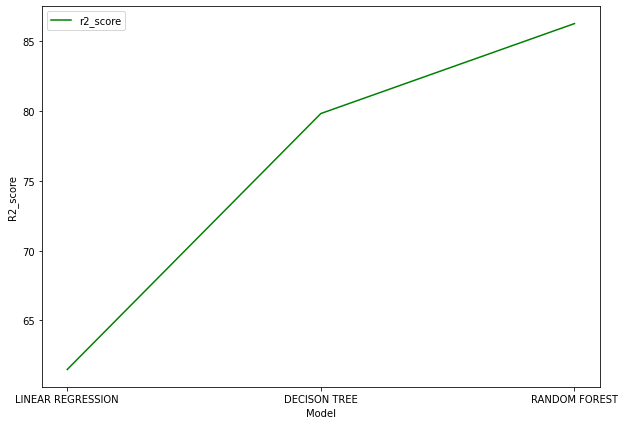

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x=scores['Model'],y=scores['R2_score'],color='green', label='r2_score')
plt.legend()
plt.show()

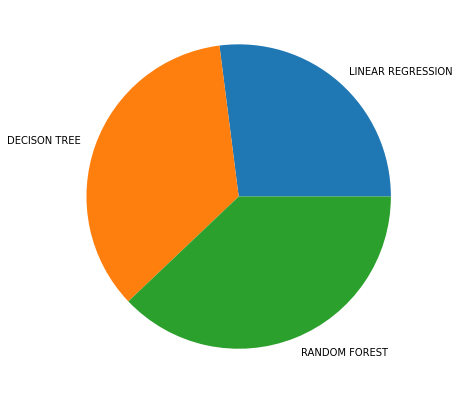

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(R2_score, labels = models)
 
# show plot
plt.show()

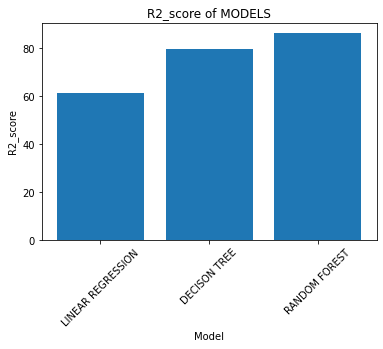

In [ ]:
plt.bar(scores['Model'], scores['R2_score'])
plt.xlabel('Model')
plt.ylabel('R2_score')
plt.title('R2_score of MODELS')
plt.xticks(rotation=45)
plt.show()